In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Week 11

### 1. 20 pts

1. Electrostatic Boundary Value Problems: the Laplace equation
(a) (15 points) Write a working program that uses the Gauss-Seidel
method with overrelaxation) method (see Programming Notes on
the next page) to solve the Laplace equation:
∂2V (x, y)
∂x2 + ∂2V (x, y)
∂y2 = 0
in the square domain 0 < x < L, 0 < y < L. We will begin with
boundary conditions V = 0 on the top and bottom edges of the
square, and V = 100 V on the left and right edges.
Iterate until V (x, y) at every grid point changes by no more than
(δV )max, a parameter you can set (Test your code using (δV )max =
10−4, and then use 10−6). Generate a well-labeled density plot of
V (x, y) using plt.imshow, and print out the number of iterations
required afor convergence. Remember to use the origin = lower
and extent=(xmin,xmax,ymin,ymax) options in plt.imshow to
define the right axis ranges.
You should find V (x, y) ≈ 50 V at the center of the square – check
this explicitly by printing out the value at x = y = L/2.

Converged in 973 iterations.
Center value V(L/2, L/2) = 49.9896 V


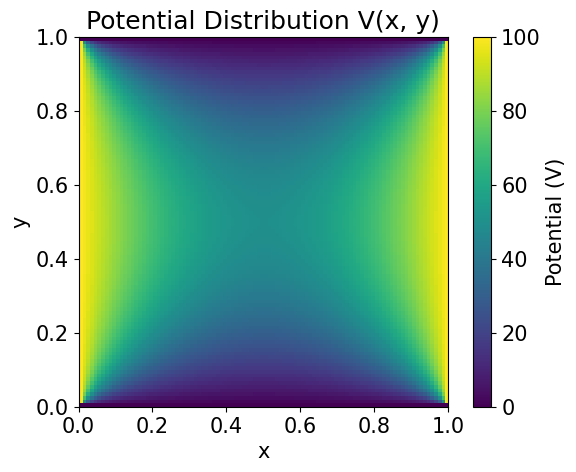

Converged in 1444 iterations.
Center value V(L/2, L/2) = 49.1570 V


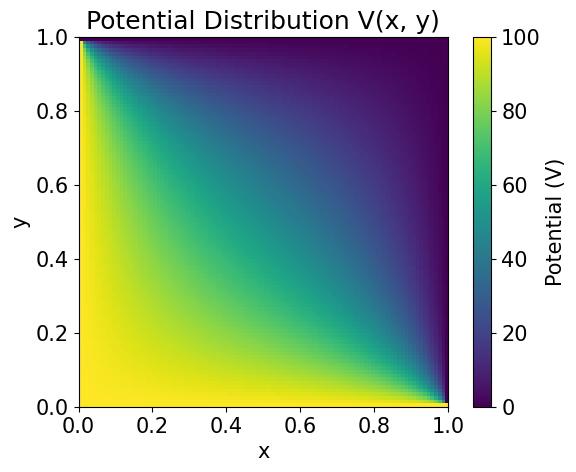

In [45]:
def solve_laplace(left, right, top, bottom, L=1.0, N=100, omega=1.8, deltaV_max=1e-4):
    h = L / (N - 1)
    V = np.zeros((N, N))

    V[:, 0] = left  
    V[:, -1] = right 
    V[0, :] = bottom     
    V[-1, :] = top    

    iterations = 0
    delta = deltaV_max + 1

    while delta > deltaV_max:
        delta = 0.0
        for i in range(1, N - 1):
            for j in range(1, N - 1):
                V_old = V[i, j]
                V_new = (1 - omega) * V_old + omega * 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1])
                V[i, j] = V_new
                delta = max(delta, abs(V_new - V_old))
        iterations += 1

    center_value = V[N//2, N//2]
    print(f"Converged in {iterations} iterations.")
    print(f"Center value V(L/2, L/2) = {center_value:.4f} V")


    plt.imshow(V, origin='lower', extent=(0, L, 0, L))
    plt.colorbar(label='Potential (V)')
    plt.title('Potential Distribution V(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

solve_laplace(100, 100, 0, 0, deltaV_max=1e-4)
solve_laplace(100, 0, 0, 100, deltaV_max=1e-6)


### 2. 15 pts

Poisson Equation: finite charge density (15 points) Add a finite
charge density (ρ 6 = 0) in a region in the center of the square:
ρ(x, y) =
{ ρ0 if L
3 < x < 2L
3 , L
3 < y < 2L
3
0 otherwise.
This involves solving the Poisson equation:
∂2V (x, y)
∂x2 + ∂2V (x, y)
∂y2 = −ρ(x, y)
0
You need ρ0 large enough to show up clearly on your plot, trying both
positive and negative charges. Try ρ0/0 = ±106 V/m2. Note also that
the above inequality applies in both x and y directions, i.e. the charge
density is centered on the square and symmetric in x and y

In [48]:
def overRelaxation(tolerance,ll, gridpts, omega, rho = 0):
    phi = np.zeros((gridpts,gridpts))
    deltaphimax = 2*tolerance 
    sweeps = 0     
    if rho == 0:
        while deltaphimax > tolerance:
            sweeps += 1
            deltaphimax = 0.0    
            for j in range(1,gridpts-1):
                for k in range(1,gridpts-1):
                    phinew = 0.25*(phi[j+1,k]+phi[j-1,k]+phi[j,k+1]+phi[j,k-1]) 
                    deltaphi = (1+omega)*(phinew - phi[j,k]) 
                    phi[j,k] += deltaphi    
                    if abs(deltaphi)>deltaphimax:  
                        deltaphimax = abs(deltaphi)  
    else:
        a = ll/(gridpts-1)
        while deltaphimax > tolerance:
            sweeps += 1
            deltaphimax = 0.0    
            for j in range(1,gridpts-1):
                for k in range(1,gridpts-1):
                    phinew = 0.25*(phi[j+1,k]+phi[j-1,k]+phi[j,k+1]+phi[j,k-1])
                    deltaphi = (1+omega)*(phinew - phi[j,k]) 
                    phi[j,k] += deltaphi      
                    if abs(deltaphi)>deltaphimax:     
                        deltaphimax = abs(deltaphi)   
    return phi

Sweeps = 947    Biggest dV = 9.837662219069897e-07 V


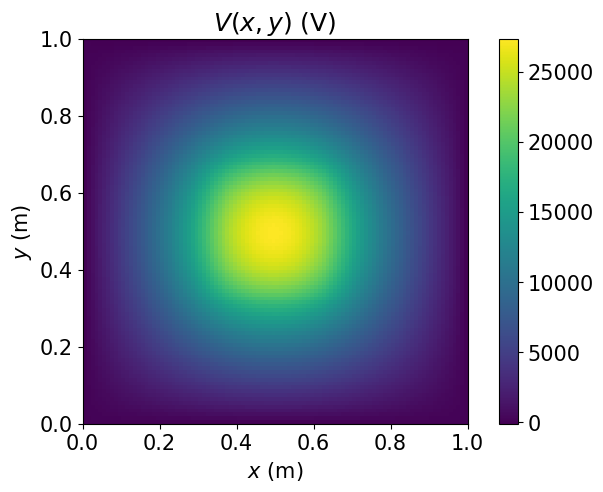

In [49]:
gridpts = 100
ll = 1
tolerance = 1e-6  
omega = 0.9
phi = np.zeros((gridpts, gridpts))
sweeps = 0
a = ll / (gridpts - 1)
rho0 = 1e6


rho = rho0 * np.zeros((gridpts, gridpts))


start = gridpts // 3
end = 2 * gridpts // 3
rho[start:end, start:end] = rho0

deltaphimax = 2*tolerance
for j in range(gridpts):
    phi[j,0] = 100.0      # left edge
    phi[j,gridpts-1] = 100.0   # right edge
for k in range(gridpts):
    phi[0,k] = 100     # bottom edge
    phi[gridpts-1,k] = -100   # top edge

while deltaphimax > tolerance:
    sweeps += 1
    deltaphimax = 0.0    
    for j in range(1,gridpts-1):
        for k in range(1,gridpts-1):
            phinew = 0.25*(phi[j+1,k]+phi[j-1,k]+phi[j,k+1]+ phi[j,k-1] + a*a*rho[j, k])
            deltaphi = (1+omega)*(phinew - phi[j,k])  
            phi[j,k] += deltaphi      
            if abs(deltaphi)>deltaphimax:     
                deltaphimax = abs(deltaphi)  

print('Sweeps =',sweeps,'   Biggest dV =',deltaphimax,'V')

# plot result
plt.rc('font',size=15)
plt.figure(figsize=(8,5))
plt.imshow(phi,origin='lower',extent=(0,ll,0,ll))
plt.colorbar()
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title(r'$V(x,y)$ (V)')
plt.show()

3. Plotting equipotentials. The previous problems covered solving the
Laplace/Poisson equations using the Gauss-Seidel method. Use your
version of the Laplace/Poisson PDE solver as a starting point to create
code that plots the equipotential curves for V (x, y) inside the square
with specified boundary conditions and charge density. These are the
curves of constant V . An example is shown on the left of Fig. 1 for the
boundary conditions V = +100 V on the left and right edges of the
squares and zero on the top and bottom edges.
Generate equipotential plots for the following boundary conditions:
(a) (10 points) V = 0 on the top and bottom edges of the square, and
V = 100 V on the left and right edges.
(b) (5 points) Same V on adjacent edges e.g. V = 100 V on left and
top, zero on other two sides.
(c) (10 points) The case in Prob 2, the centered square of charge:
ρ(x, y) =
{ ρ0 if L
3 < x < 2L
3 , L
3 < y < 2L
3 ,
0 otherwise
}
with ρ0/0 = ±106 V/m2.

Sweeps = 694    Biggest dV = 9.84749220123149e-07 V


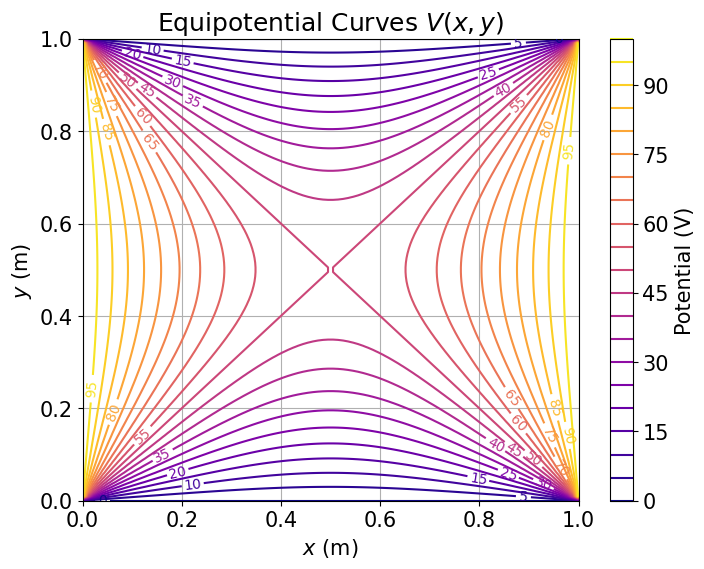

In [ ]:

gridpts = 100
ll = 1
tolerance = 1e-6
omega = 0.9
a = ll / (gridpts - 1)
rho0 = 1e6

phi = np.zeros((gridpts, gridpts))
rho = np.zeros((gridpts, gridpts))

start = gridpts // 3
end = 2 * gridpts // 3
rho[start:end, start:end] = rho0

def createPhi(left, right, bot, top, gridpts):
    phi = np.zeros((gridpts, gridpts))
    for j in range(gridpts):
        phi[j, 0] = left         # left edge
        phi[j, gridpts-1] = right  # right edge
    for k in range(gridpts):
        phi[0, k] = bot          # bottom edge
        phi[gridpts-1, k] = top    # top edge
    return phi

phi = createPhi(100, 100, 0, 0, gridpts)

deltaphimax = 2 * tolerance
sweeps = 0

while deltaphimax > tolerance:
    sweeps += 1
    deltaphimax = 0.0    
    for j in range(1, gridpts-1):
        for k in range(1, gridpts-1):
            phinew = 0.25 * (phi[j+1, k] + phi[j-1, k] + phi[j, k+1] + phi[j, k-1])
            deltaphi = (1 + omega) * (phinew - phi[j, k])
            phi[j, k] += deltaphi
            if abs(deltaphi) > deltaphimax:
                deltaphimax = abs(deltaphi)

print('Sweeps =', sweeps, '   Biggest dV =', deltaphimax, 'V')


plt.rc('font', size=15)
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(np.linspace(0, ll, gridpts), np.linspace(0, ll, gridpts))
contours = plt.contour(X, Y, phi, levels=20, cmap='plasma') 
plt.clabel(contours, inline=True, fontsize=10)
plt.colorbar(contours, label='Potential (V)')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title(r'Equipotential Curves $V(x,y)$')
plt.grid(True)
plt.show()


Sweeps = 694    Biggest dV = 9.84749193122525e-07 V


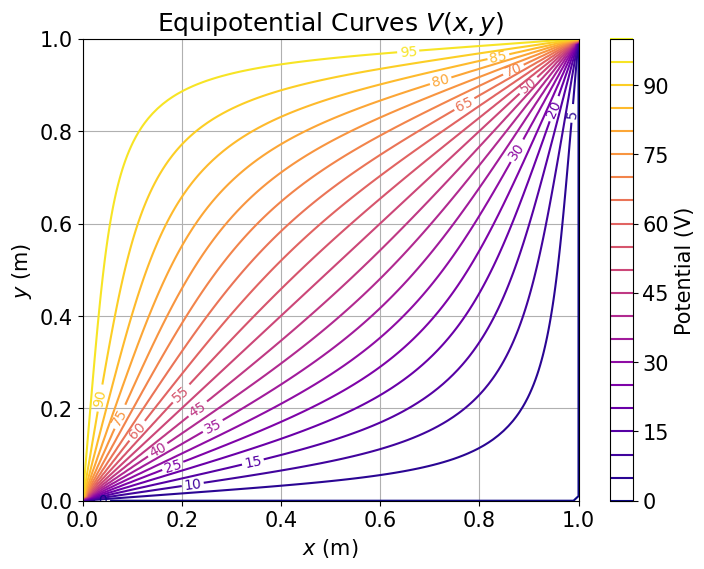

In [ ]:
gridpts = 100
ll = 1
tolerance = 1e-6
omega = 0.9
a = ll / (gridpts - 1)
rho0 = 1e6

phi = np.zeros((gridpts, gridpts))
rho = np.zeros((gridpts, gridpts))

start = gridpts // 3
end = 2 * gridpts // 3
rho[start:end, start:end] = rho0
left = 100
right = 0
bot = 0
top = 100

phi = np.zeros((gridpts, gridpts))
for j in range(gridpts):
    phi[j, 0] = left         # left edge
    phi[j, gridpts-1] = right  # right edge
for k in range(gridpts):
    phi[0, k] = bot          # bottom edge
    phi[gridpts-1, k] = top    # top edge


deltaphimax = 2 * tolerance
sweeps = 0

while deltaphimax > tolerance:
    sweeps += 1
    deltaphimax = 0.0    
    for j in range(1, gridpts-1):
        for k in range(1, gridpts-1):
            phinew = 0.25 * (phi[j+1, k] + phi[j-1, k] + phi[j, k+1] + phi[j, k-1])
            deltaphi = (1 + omega) * (phinew - phi[j, k])
            phi[j, k] += deltaphi
            if abs(deltaphi) > deltaphimax:
                deltaphimax = abs(deltaphi)

print('Sweeps =', sweeps, '   Biggest dV =', deltaphimax, 'V')

# Plot equipotential curves (contours)
plt.rc('font', size=15)
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(np.linspace(0, ll, gridpts), np.linspace(0, ll, gridpts))
contours = plt.contour(X, Y, phi, levels=20, cmap='plasma')  # 20 contour lines
plt.clabel(contours, inline=True, fontsize=10)
plt.colorbar(contours, label='Potential (V)')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title(r'Equipotential Curves $V(x,y)$')
plt.grid(True)
plt.show()


Sweeps = 947    Biggest dV = 9.858882549451663e-07 V


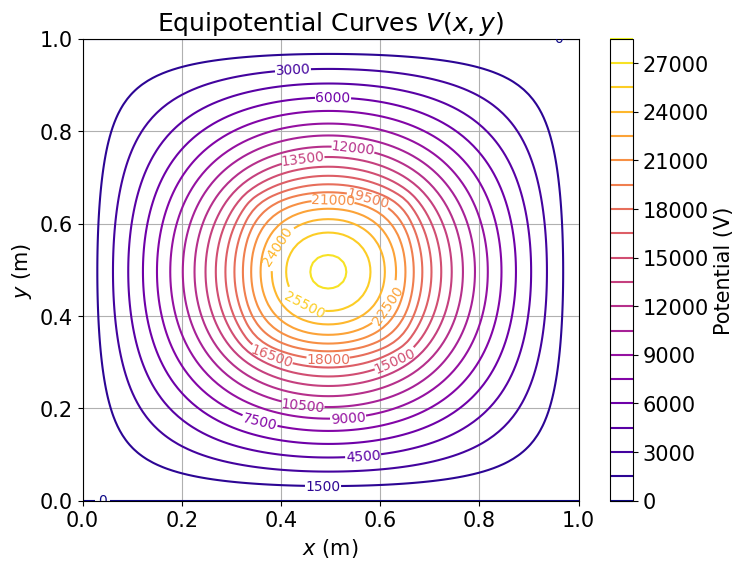

In [ ]:

gridpts = 100
ll = 1
tolerance = 1e-6
omega = 0.9
a = ll / (gridpts - 1)
rho0 = 1e6

phi = np.zeros((gridpts, gridpts))
rho = np.zeros((gridpts, gridpts))

start = gridpts // 3
end = 2 * gridpts // 3
rho[start:end, start:end] = rho0

def createPhi(left, right, bot, top, gridpts):
    phi = np.zeros((gridpts, gridpts))
    for j in range(gridpts):
        phi[j, 0] = left         # left edge
        phi[j, gridpts-1] = right  # right edge
    for k in range(gridpts):
        phi[0, k] = bot          # bottom edge
        phi[gridpts-1, k] = top    # top edge
    return phi

phi = createPhi(100, 100, 0, 0, gridpts)

deltaphimax = 2 * tolerance
sweeps = 0

while deltaphimax > tolerance:
    sweeps += 1
    deltaphimax = 0.0    
    for j in range(1, gridpts-1):
        for k in range(1, gridpts-1):
            phinew = 0.25 * (phi[j+1, k] + phi[j-1, k] + phi[j, k+1] + phi[j, k-1]+ a*a*rho[j, k])
            deltaphi = (1 + omega) * (phinew - phi[j, k])
            phi[j, k] += deltaphi
            if abs(deltaphi) > deltaphimax:
                deltaphimax = abs(deltaphi)

print('Sweeps =', sweeps, '   Biggest dV =', deltaphimax, 'V')

# Plot equipotential curves (contours)
plt.rc('font', size=15)
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(np.linspace(0, ll, gridpts), np.linspace(0, ll, gridpts))
contours = plt.contour(X, Y, phi, levels=20, cmap='plasma')  # 20 contour lines
plt.clabel(contours, inline=True, fontsize=10)
plt.colorbar(contours, label='Potential (V)')
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title(r'Equipotential Curves $V(x,y)$')
plt.grid(True)
plt.show()


4. Plotting the electric field. (25 points) In two dimensions the com-
ponents of the electric field are calculated from the potential V (x, y)
as follows:
Ex = −∂V (x, y)
∂x , Ey = −∂V (x, y)
∂y .
Compute the vector field components E(x, y) = [Ex, Ey] and plot the
electric field vectors E as arrows at a set of points, with the lengths of
the arrows showing the magnitude of the field and the direction of the
arrows showing the direction of the field. See Fig. 1 , middle.
Make versions of your program to plot electric field vectors for the
corresponding boundary conditions and charge conditions used in the
previous problem.

Sweeps = 694, Final max ΔV = 9.85e-07 V


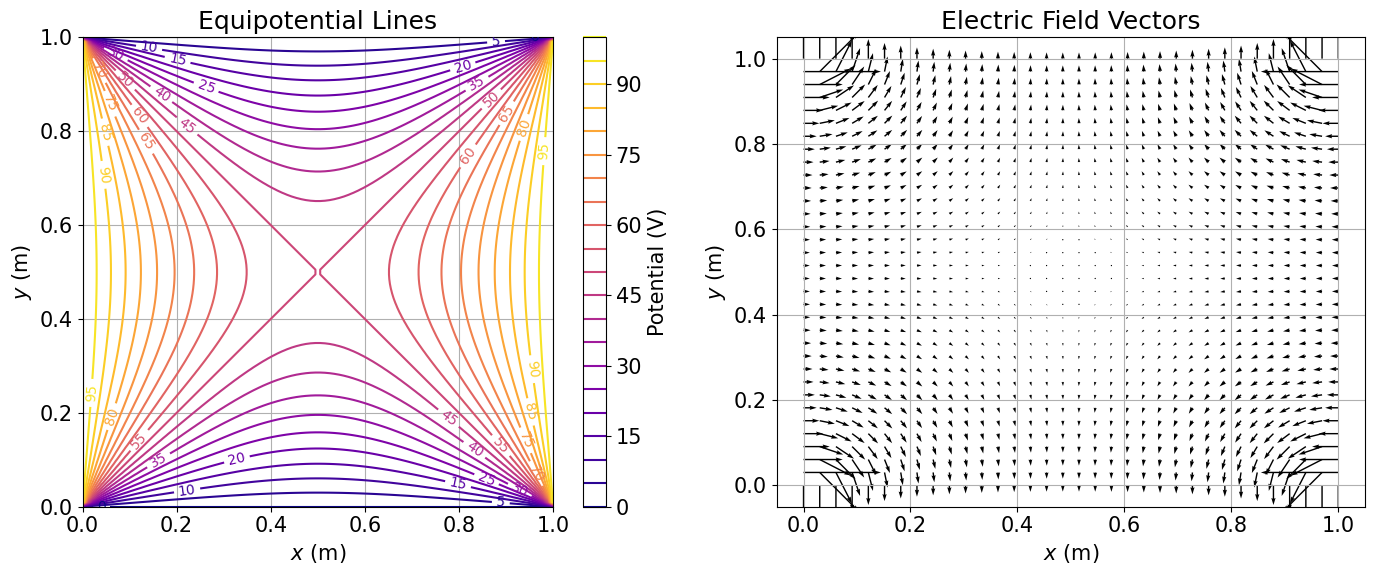

Sweeps = 694, Final max ΔV = 9.85e-07 V


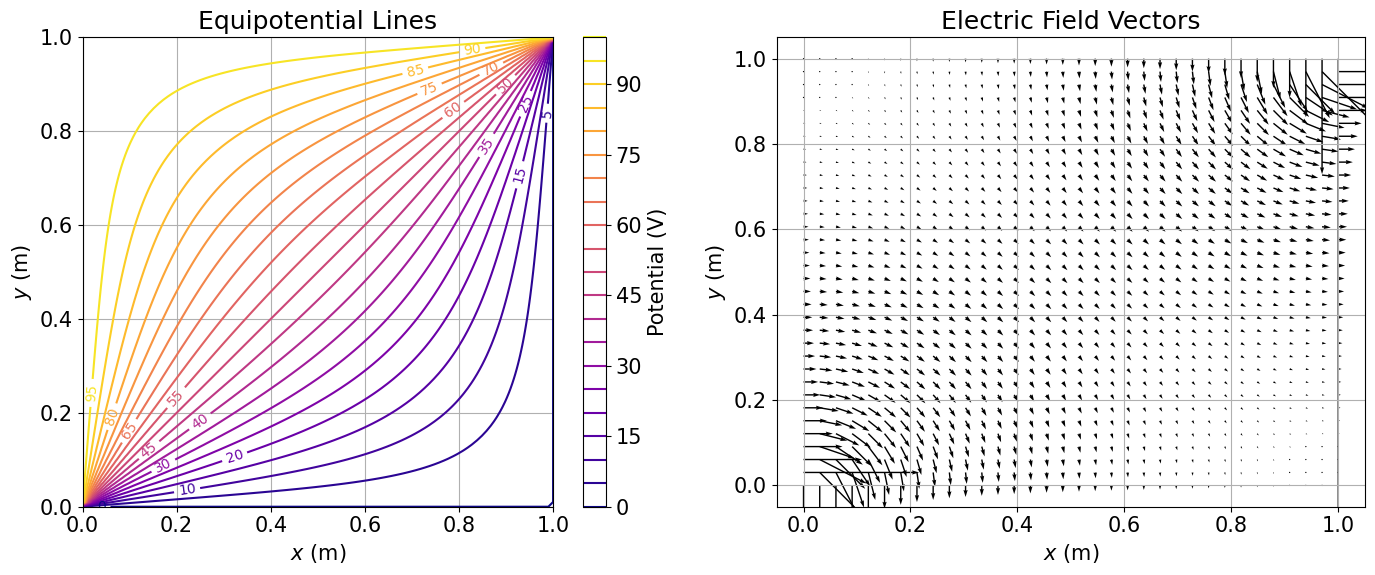

Sweeps = 947, Final max ΔV = 9.81e-07 V


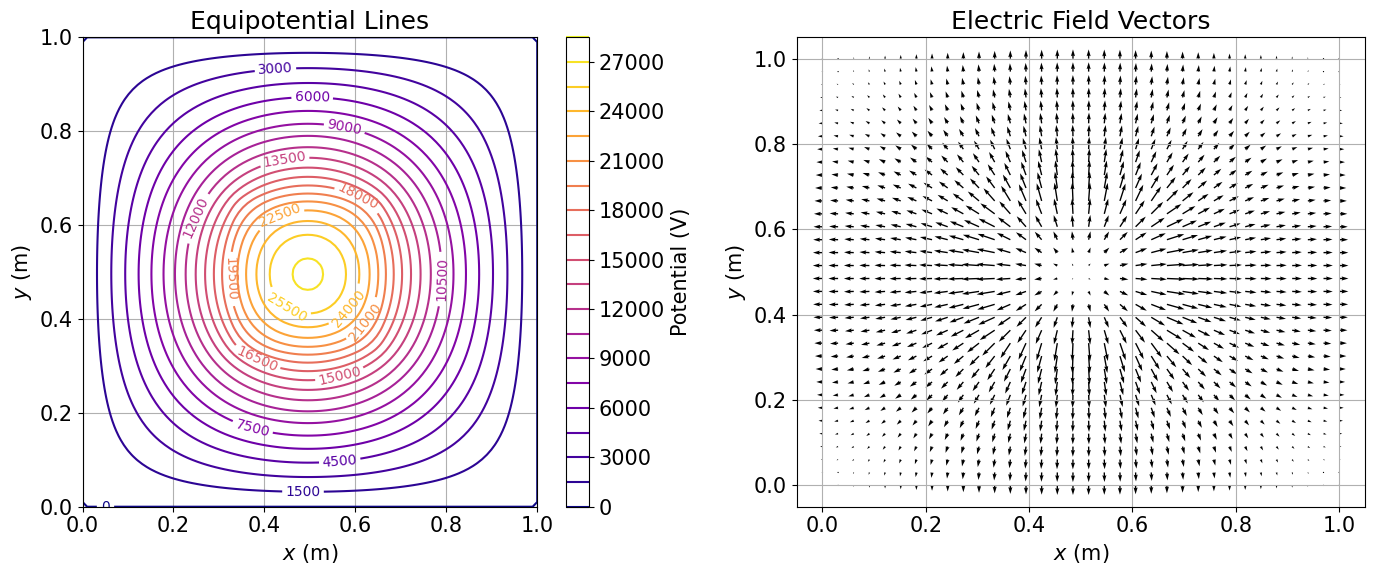

In [37]:
def efield(gridpts=100, ll=1.0, tolerance=1e-6, omega=0.9, 
                   rho0=1e6, includeRho=False, 
                   V_left=0, V_right=0, V_bottom=0, V_top=0):

    a = ll / (gridpts - 1)
    phi = np.zeros((gridpts, gridpts))
    rho = np.zeros((gridpts, gridpts))

    if includeRho:
        start = gridpts // 3
        end = 2 * gridpts // 3
        rho[start:end, start:end] = rho0

    for j in range(gridpts):
        phi[j, 0] = V_left
        phi[j, -1] = V_right
    for k in range(gridpts):
        phi[0, k] = V_bottom
        phi[-1, k] = V_top

    deltaphimax = 2 * tolerance
    sweeps = 0
    while deltaphimax > tolerance:
        sweeps += 1
        deltaphimax = 0.0    
        for j in range(1, gridpts-1):
            for k in range(1, gridpts-1):
                phinew = 0.25 * (phi[j+1, k] + phi[j-1, k] + phi[j, k+1] + phi[j, k-1] + a*a*rho[j, k])
                deltaphi = (1 + omega) * (phinew - phi[j, k])
                phi[j, k] += deltaphi
                deltaphimax = max(deltaphimax, abs(deltaphi))

    print(f"Sweeps = {sweeps}, Final max ΔV = {deltaphimax:.2e} V")

    eex = np.zeros_like(phi)
    eey = np.zeros_like(phi)
    for j in range(gridpts):
        for k in range(gridpts):
            if k == 0:
                eex[j, k] = -(phi[j, k+1] - phi[j, k]) / a
            elif k == gridpts - 1:
                eex[j, k] = -(phi[j, k] - phi[j, k-1]) / a
            else:
                eex[j, k] = -(phi[j, k+1] - phi[j, k-1]) / (2 * a)

            if j == 0:
                eey[j, k] = -(phi[j+1, k] - phi[j, k]) / a
            elif j == gridpts - 1:
                eey[j, k] = -(phi[j, k] - phi[j-1, k]) / a
            else:
                eey[j, k] = -(phi[j+1, k] - phi[j-1, k]) / (2 * a)

    X, Y = np.meshgrid(np.linspace(0, ll, gridpts), np.linspace(0, ll, gridpts))
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    contours = plt.contour(X, Y, phi, levels=20, cmap='plasma')
    plt.clabel(contours, inline=True, fontsize=10)
    plt.colorbar(contours, label='Potential (V)')
    plt.title('Equipotential Lines')
    plt.xlabel(r'$x$ (m)')
    plt.ylabel(r'$y$ (m)')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    skip = 3  
    plt.quiver(X[::skip, ::skip], Y[::skip, ::skip],eex[::skip, ::skip], eey[::skip, ::skip])
    plt.title('Electric Field Vectors')
    plt.xlabel(r'$x$ (m)')
    plt.ylabel(r'$y$ (m)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

efield(V_left=100, V_right=100, V_bottom=0, V_top=0)
efield(V_left=100, V_right=0, V_bottom=0, V_top=100)
efield(V_left=0, V_right=0, V_bottom=0, V_top=0, includeRho = True)

Sweeps = 251    Biggest dV = 9.75413796155955e-07 V


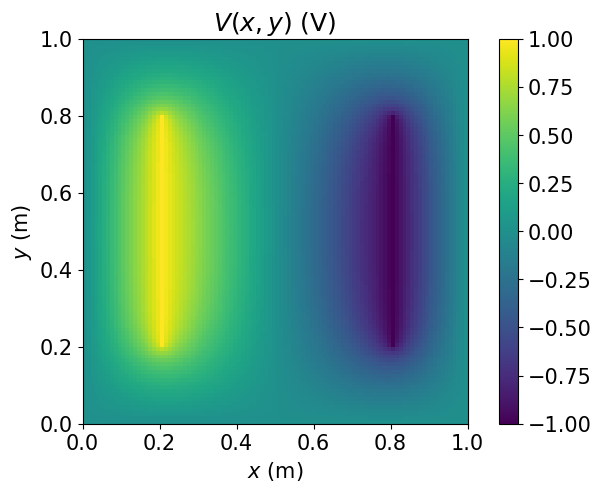

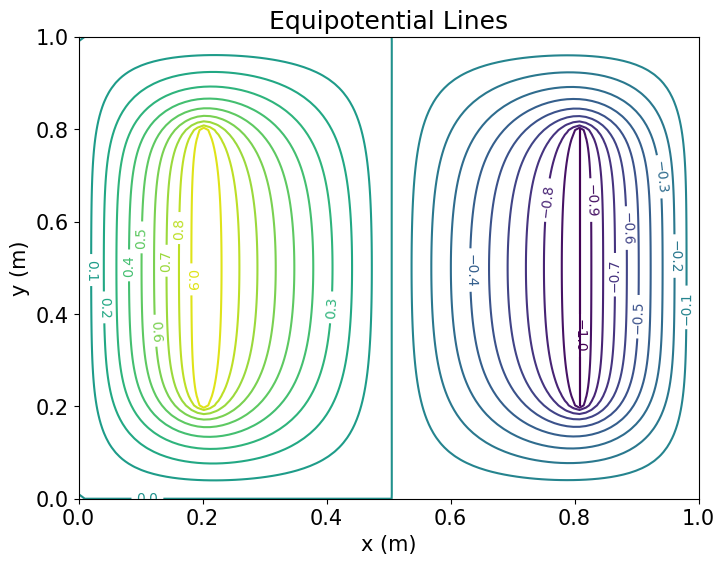

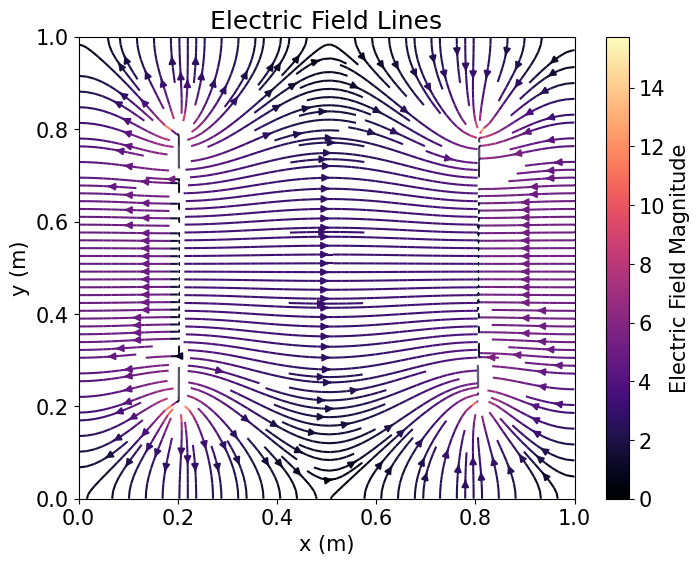

In [41]:
gridpts = 100
ll = 1
tolerance = 1e-6  
omega = 0.9
phi = np.zeros((gridpts, gridpts))
sweeps = 0
a = ll / (gridpts - 1)
rho0 = 1e6


rho = rho0 * np.zeros((gridpts, gridpts))


start = gridpts // 3
end = 2 * gridpts // 3
rho[start:end, start:end] = rho0

deltaphimax = 2*tolerance
for j in range(gridpts):
    phi[j, 0] = 0      # left edge
    phi[j, gridpts-1] = 0   # right edge
for k in range(gridpts):
    phi[0, k] = 0     # bottom edge
    phi[gridpts-1, k] = 0   # top edge


for j in range(20, 80):
    phi[j, 20] = 1

for j in range(20, 80):
    phi[j, 80] = -1

deltaphimax = 2 * tolerance
while deltaphimax > tolerance:
    sweeps += 1
    deltaphimax = 0.0    
    for j in range(1, gridpts-1):
        for k in range(1, gridpts-1):
            if (k == 20 and 20 <= j < 80) or (k == 80 and 20 <= j < 80):
                continue
            phinew = 0.25 * (phi[j+1,k] + phi[j-1,k] + phi[j,k+1] + phi[j,k-1])
            deltaphi = (1+omega)*(phinew - phi[j,k])
            phi[j,k] += deltaphi
            if abs(deltaphi) > deltaphimax:
                deltaphimax = abs(deltaphi)

                

print('Sweeps =',sweeps,'   Biggest dV =',deltaphimax,'V')

plt.rc('font',size=15)
plt.figure(figsize=(8,5))
plt.imshow(phi,origin='lower',extent=(0,ll,0,ll))
plt.colorbar()
plt.xlabel(r'$x$ (m)')
plt.ylabel(r'$y$ (m)')
plt.title(r'$V(x,y)$ (V)')
plt.show()

x = np.linspace(0, ll, gridpts)
y = np.linspace(0, ll, gridpts)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(8,6))
cp = plt.contour(X, Y, phi, levels=20)
plt.clabel(cp, inline=True, fontsize=10)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Equipotential Lines')
plt.show()

Ey, Ex = np.gradient(-phi, a, a) 

plt.figure(figsize=(8,6))
plt.streamplot(X, Y, Ex, Ey, color=np.sqrt(Ex**2 + Ey**2), cmap = 'magma', density=2)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field Lines')
plt.colorbar(label='Electric Field Magnitude')
plt.show()